In [ ]:
pip install squarify

In [ ]:
import numpy as np                      #used for scientific computation
import pandas as pd                     #used for data mugging and preprocessing
import matplotlib.pyplot as plt         #data visualization library
from pandas import DataFrame as show    # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns                   # stastical visualization library
import squarify                         #used to make square area plots
%matplotlib inline                      #used in jupyter notebook for interactive visualizations within notebook

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
UsageError: unrecognized arguments: #used in jupyter notebook for interactive visualizations within notebook


DATA FORMATTING

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/startup_funding.csv")

In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31-01-2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [ ]:
print('Rows {rows} in total and Columns {columns} in total'.format(rows=df.shape[0],columns=df.shape[1]))

Rows 3044 in total and Columns 10 in total


In [ ]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(df.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3009 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2073 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None


DATA CLEANING

In [ ]:
print("Information of total number of empty columns")
print("-------------------------------------------------")
print(df.isnull().sum())

Information of total number of empty columns
-------------------------------------------------
Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         35
InvestmentnType         4
Amount in USD         971
Remarks              2625
dtype: int64


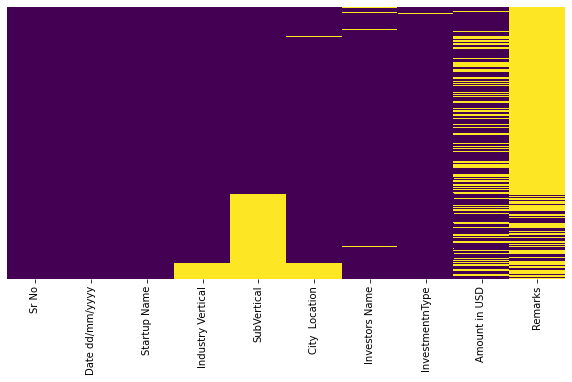

In [ ]:
plt.figure(figsize=(10,5))                                            #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)   #heatmaps are matrix plots which can visualize data in 2D
plt.show()

In [ ]:
print("Here we can see in date column error- '.' is there instead of '/'")
df[df['Date dd/mm/yyyy']=='12/05.2015']['Date dd/mm/yyyy']

Here we can see in date column error- '.' is there instead of '/'


2775    12/05.2015
2776    12/05.2015
Name: Date dd/mm/yyyy, dtype: object

In [ ]:
df['Amount in USD'].head(5)  #head(n) displays n rows

0    20,00,00,000
1       80,48,394
2     1,83,58,860
3       30,00,000
4       18,00,000
Name: Amount in USD, dtype: object

In [ ]:
df['City  Location'] = df['City  Location'].fillna(value='NotSpecific') 

In [ ]:
df['Industry Vertical'] = df['Industry Vertical'].fillna(value='Other')

In [ ]:
df["City  Location"].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', 'NotSpecific', 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala'

In [ ]:
import re                               #importing regular expressions
def convert_Slash(x):                   #converts citylocation where multiple citiescentres
    x=x.lower()                         #converting  whole data to lower case to avoid dublicate entries 
    if re.search('/',x):
      return x.split('/')[0].strip()    #converting multiple citycentres to single one   
    else :
      return x.strip()                 # removing extra spaces from left and right to reduce duplicate cities

df['City  Location']=df['City  Location'].apply(convert_Slash)

In [ ]:
df["City  Location"].unique()

array(['bengaluru', 'gurgaon', 'new delhi', 'mumbai', 'chennai', 'pune',
       'noida', 'faridabad', 'san francisco', 'san jose,', 'amritsar',
       'delhi', 'kormangala', 'tulangan', 'hyderabad', 'burnsville',
       'menlo park', 'gurugram', 'palo alto', 'santa monica', 'singapore',
       'taramani', 'andheri', 'chembur', 'nairobi', 'haryana', 'new york',
       'karnataka', 'bhopal', 'bengaluru and gurugram', 'india', 'jaipur',
       'nagpur', 'indore', 'new york, bengaluru', 'california',
       'ahemadabad', 'rourkela', 'srinagar', 'bhubneswar', 'chandigarh',
       'delhi & cambridge', 'kolkatta', 'kolkata', 'coimbatore',
       'bangalore', 'udaipur', 'notspecific', 'ahemdabad', 'bhubaneswar',
       'ahmedabad', 'surat', 'goa', 'uttar pradesh', 'nw delhi', 'gaya',
       'vadodara', 'trivandrum', 'missourie', 'panaji', 'gwalior',
       'karur', 'udupi', 'kochi', 'agra', 'hubli', 'kerala', 'kozhikode',
       'us', 'siliguri', 'usa', 'lucknow', 'kanpur', 'sfo', 'london',
  

In [ ]:
newdf=df.copy()#backup cleansed data
del newdf['Remarks']#remaks is deleted to overcome stability in analysis
del newdf['Sr No']

In [ ]:
newdf["InvestmentnType"].value_counts()

Seed Funding                   1382
Private Equity                 1357
Seed/ Angel Funding              60
Seed / Angel Funding             47
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Pre-Series A                      4
Seed                              4
Private Equity Round              4
SeedFunding                       3
Seed / Angle Funding              3
Corporate Round                   2
Series F                          2
Venture Round                     2
Series E                          2
Equity                            2
pre-Series A                      2
Venture - Series N/A              1
Maiden Round                      1
Seed funding                      1
Bridge Round                      1
Angel Round                 

In [ ]:
newdf['InvestmentnType'] = newdf.InvestmentnType.astype('category')

In [ ]:
newdf['InvestmentnType'] = newdf['InvestmentnType'].apply(lambda x:x.replace(' ','').lower()) #code to apply mapping to remove duplicate categories

newdf['InvestmentnType'].value_counts()

seedfunding                 1386
privateequity               1358
seed/angelfunding            130
debtfunding                   25
seriesa                       24
seriesb                       20
seriesc                       14
seriesd                       12
pre-seriesa                    8
angel/seedfunding              8
seedround                      7
seed                           4
privateequityround             4
seed/anglefunding              3
crowdfunding                   2
seriese                        2
equity                         2
corporateround                 2
seriesf                        2
ventureround                   2
termloan                       1
venture                        1
venture-seriesn/a              1
private                        1
inhousefunding                 1
seriesh                        1
debt-funding                   1
seedfundinground               1
angelfunding                   1
singleventure                  1
angel     

In [ ]:
newdf["InvestmentnType"].replace({"angel/seedfunding": "seed/angelfunding", "seed/anglefunding": "seed/angelfunding", "pre-seriesa": "preseriesa"}, inplace=True)

In [ ]:
newdf['InvestmentnType'].value_counts()

seedfunding                 1386
privateequity               1358
seed/angelfunding            141
debtfunding                   25
seriesa                       24
seriesb                       20
seriesc                       14
seriesd                       12
preseriesa                     9
seedround                      7
seed                           4
privateequityround             4
seriese                        2
crowdfunding                   2
corporateround                 2
ventureround                   2
seriesf                        2
equity                         2
seriesj                        1
debt-funding                   1
seedfundinground               1
angelfunding                   1
singleventure                  1
inhousefunding                 1
structureddebt                 1
private                        1
venture-seriesn/a              1
seriesb(extension)             1
angelround                     1
debt                           1
bridgeroun

In [ ]:
def rem_err_date(x):                #function checks for error in format of date column in funding dataframe
    if re.search('.',x):            #data column has formatting errors like '12/052015','13/042015' where backslash (/) is missing or at wrong position
        return x.replace('.','')
    return x

def rem_err_date1(x):
  if re.search('-',x):
    return x.replace('-','/')
  return x

newdf['Date dd/mm/yyyy']=newdf['Date dd/mm/yyyy'].apply(rem_err_date)             #applying user defined funciton to date column using apply() which maps u.d.f to each record of date column
newdf['Date dd/mm/yyyy']=newdf['Date dd/mm/yyyy'].apply(rem_err_date1)
newdf['Date dd/mm/yyyy'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date dd/mm/yyyy'].replace('05/072018','05/07/2018',inplace=True)
newdf['Date dd/mm/yyyy'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date dd/mm/yyyy'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date dd/mm/yyyy'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date dd/mm/yyyy'].replace('01/07/015','01/07/2015',inplace=True)
newdf['Date dd/mm/yyyy']=pd.to_datetime(newdf['Date dd/mm/yyyy'],format='%d/%m/%Y')#d/m/y is the format and to_datetime() is used to convert the datatype of date column to "datetime" from string


In [ ]:
newdf.dtypes

Date dd/mm/yyyy      datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD                object
dtype: object

In [ ]:
def calculate_n_investors(x):             #function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors'] = newdf['Investors Name'].replace(np.NaN,'empty').apply(calculate_n_investors) #removing missing investors and replacing with 'empty'


In [ ]:
n_inv2 = newdf

n_inv = newdf['Investors Name']
n_inv.fillna(value='None',inplace=True)
listed_n_inv = n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors)) 

In [ ]:
investors=pd.Series(investors)
unique_investors=pd.Series(unique_investors)

In [ ]:
investors=list(investors[investors!=''])
unique_investors=list(unique_investors[unique_investors!=''])

In [ ]:
for i in range(len(unique_investors)):
  for j in range(len(investors)):
    if re.search(unique_investors[i],investors[j]):            
      investors[j] = unique_investors[i]

error: ignored

FILLING MISSING VALUES IN AmountInUSD

In [ ]:
def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newdf['Amount in USD'] = newdf[newdf['Amount in USD'].notnull()]["Amount in USD"].apply(convert_AmountInUSD)

In [ ]:
newdf['Amount in USD'] = newdf[newdf['Amount in USD'].notnull()]["Amount in USD"].astype(float).astype(int)

In [ ]:
newdf['InvestmentnType'].fillna(method='bfill',inplace=True) #backward filling of null values

In [ ]:
newdf.iloc[:,[1,2,3,4,6]] = newdf.iloc[:,[1,2,3,4,6]].applymap(lambda x: x.lower().replace(' ','') if pd.notnull(x) is True else x )

In [ ]:
def check(x):
    if(pd.notnull(x)):
        return x.lower()
newdf.iloc[:,3]=newdf.iloc[:,3].apply(check)  

In [ ]:
newdf['Amount in USD'] = round(newdf['Amount in USD'].fillna(np.mean(newdf['Amount in USD'])))
newdf['Amount in USD'] = newdf['Amount in USD'].astype('int')

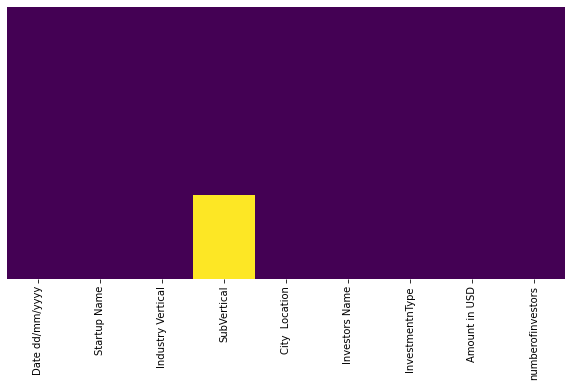

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(newdf.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

In [ ]:
unique_startup_name = list(newdf['Startup Name'].unique())
startupname = list(newdf['Startup Name'])

In [ ]:
for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]

In [ ]:
newdf['Startup Name'] = startupname

INDEPTH ANALYSIS

In [ ]:
newdf.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,numberofinvestors
0,2020-01-09,byju’s,e-tech,e-learning,bengaluru,Tiger Global Management,privateequityround,200000000,1
1,2020-01-13,shuttl,transportation,appbasedshuttleservice,gurgaon,Susquehanna Growth Equity,seriesc,8048394,1
2,2020-01-09,mamaearth,e-commerce,retailerofbabyandtoddlerproducts,bengaluru,Sequoia Capital India,seriesb,18358860,1
3,2020-01-02,thb,fintech,onlineinvestment,newdelhi,Vinod Khatumal,preseriesa,3000000,1
4,2020-01-02,fashor,fashionandapparel,embroiledclothesforwomen,mumbai,Sprout Venture Partners,seedround,1800000,1
